**Used data**: GapMinder

**Description**: one year data of numerous country-level indicators of health, wealth and development.

**Question**: Does income correlate with life expectancy?

**Variables**:
1. Explanatory variable: Income per person
2. Response variable: life expectancy

In [1]:
import pandas as pd
import scipy
import seaborn
import matplotlib.pyplot as plt
from decimal import Decimal

In [2]:
# read the data
df = pd.read_csv("../gapminder.csv", low_memory=False)

In [3]:
# Select column of interest
explanatory,response = "incomeperperson","lifeexpectancy"
sub = df[[explanatory,response]].apply(pd.to_numeric, errors='coerce') \
    .dropna()
sub

Pearson coefficient (r),p-value,r2
0.601516,1.07E-18,0.361822


In [ ]:
rval, pval = scipy.stats.pearsonr(sub[explanatory], sub[response])
r2val = rval**2
pd.DataFrame([{"Pearson coefficient (r)": rval, "p-value":'%.2E' % Decimal(pval), "r2": r2val}]).style.hide_index()

Text(0.5, 1.0, 'Association between income and life expectancy')

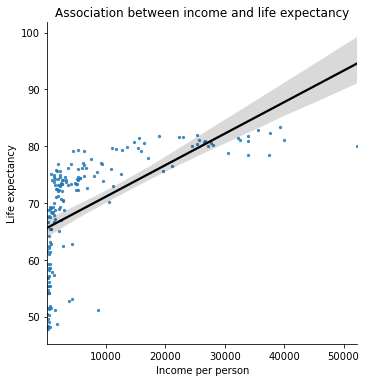

In [4]:
seaborn.lmplot(data=sub,
             x=explanatory, 
             y=response, 
             fit_reg=True, 
             scatter_kws={"s": 5},
            line_kws={'color': 'black'})
plt.xlabel("Income per person")
plt.ylabel("Life expectancy")
plt.title("Association between income and life expectancy")

**Conclusion**: the data shows that income has positive correlation with life expectancy. The r2 value of 0.37 signifies that the average income per person can predict 37% the variability we see in the life expectancy.